# Actividad: Clasificación con K-Nearest Neighbors (KNN)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## 1. Generación del dataset

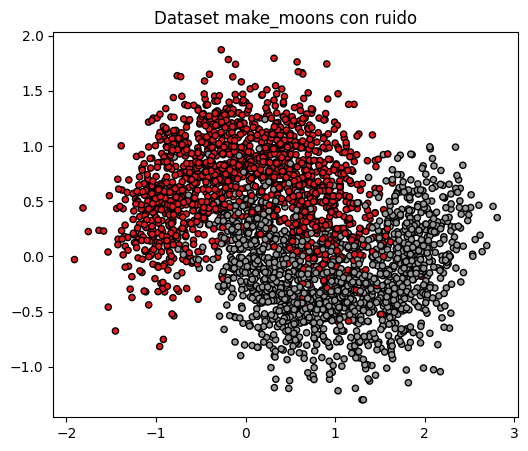

In [ ]:
X, y = make_moons(n_samples=3000, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, edgecolor="k", s=20)
plt.title("Dataset make_moons con ruido")
plt.show()

## 2. Entrenamiento inicial con KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print("Accuracy en test:", knn.score(X_test_std, y_test))
print(classification_report(y_test, y_pred, digits=3))

Accuracy en test: 0.8955555555555555
              precision    recall  f1-score   support

           0      0.920     0.867     0.892       450
           1      0.874     0.924     0.898       450

    accuracy                          0.896       900
   macro avg      0.897     0.896     0.895       900
weighted avg      0.897     0.896     0.895       900



## 3. Selección del mejor valor de K

Mejor K según CV: 15


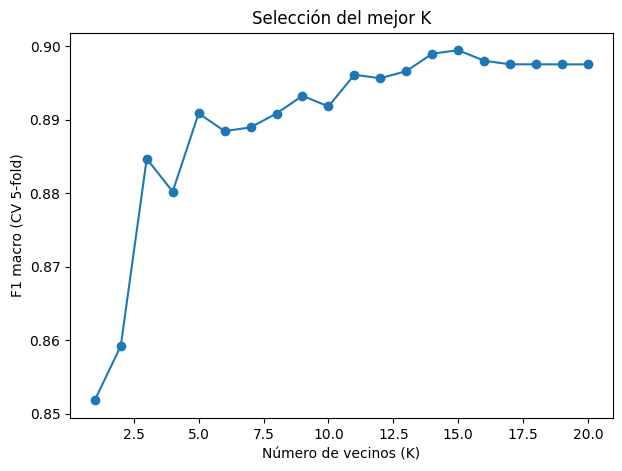

In [ ]:
k_values = range(1, 21)
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(knn, X_train_std, y_train, cv=5, scoring="f1_macro").mean()
    scores.append(cv_score)

best_k = k_values[np.argmax(scores)]
print("Mejor K según CV:", best_k)

plt.figure(figsize=(7,5))
plt.plot(k_values, scores, marker="o")
plt.xlabel("Número de vecinos (K)")
plt.ylabel("F1 macro (CV 5-fold)")
plt.title("Selección del mejor K")
plt.show()

## 4. Visualización de la frontera de decisión

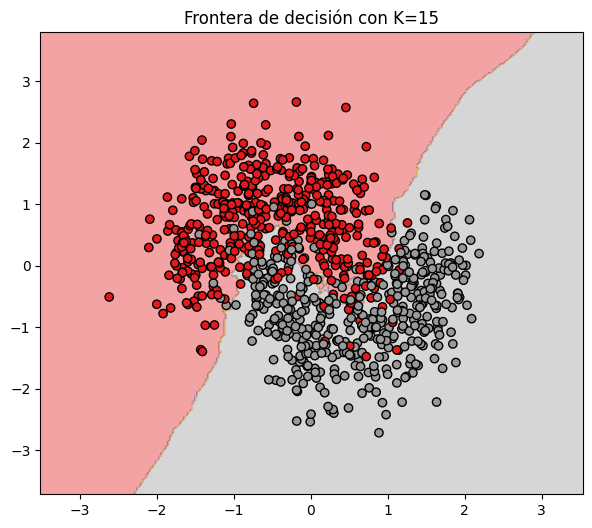

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_std, y_train)

x_min, x_max = X_train_std[:,0].min() - 1, X_train_std[:,0].max() + 1
y_min, y_max = X_train_std[:,1].min() - 1, X_train_std[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)
plt.scatter(X_test_std[:,0], X_test_std[:,1], c=y_test, cmap=plt.cm.Set1, edgecolor="k")
plt.title(f"Frontera de decisión con K={best_k}")
plt.show()

## 5. Métricas de desempeño

Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.939     0.884     0.911       450
           1      0.891     0.942     0.916       450

    accuracy                          0.913       900
   macro avg      0.915     0.913     0.913       900
weighted avg      0.915     0.913     0.913       900



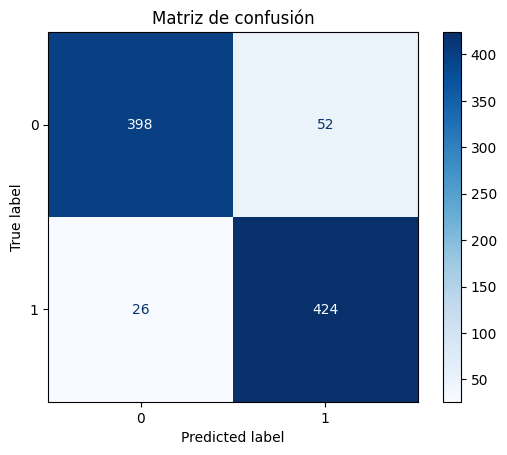

In [ ]:
y_pred = knn.predict(X_test_std)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.show()

# Actividad
Vamos a visualizar este dataset usando t-SNE y UMAP. Para esto haga lo siguiente:

* Aplique KNN inicial con `k = 3` y muestre `classification_report`
* Seleccione el mejor K entre 1 y 15 utilizando cross validation con 3 folds y f1-weighted como métrica de `score`
* Grafique frontera de decisión para el mejor K encontrado del punto anterior
* Muestre classification_report y matriz de confusión para las 3 clases
* Calcule "a mano" (en una celda) precision, recall y f1 **solo para la clase 2** guiandose en la matriz de confusión
* Cuanto termine, me avisa para marcarlo como logrado.
* Pueden trabajar de a dos o tres.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## 1. Generación del dataset (3 clases)

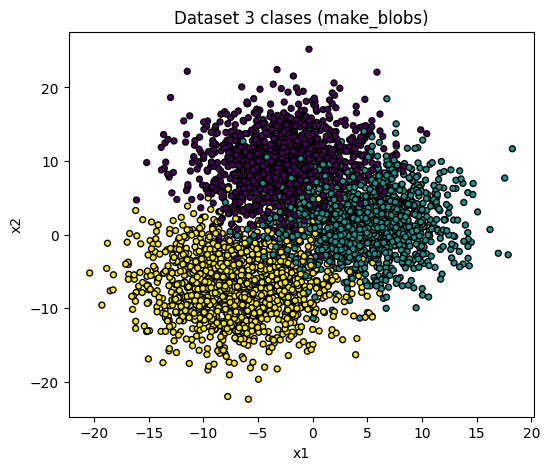

In [ ]:
# Tres clústeres con solapamiento moderado
X, y = make_blobs(n_samples=4000, centers=3, cluster_std=[4.2, 4.2, 4.2], n_features=2, random_state=42)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Estandarización
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

# Vista del dataset original
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, edgecolor="k", s=18)
plt.title("Dataset 3 clases (make_blobs)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()
